In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [13]:
image_id = '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0'
data_dir = '/home/adil/dev/kaggle-protein-classification/data/train'

In [14]:
ATTR_FMT = '{} channel: mean = {}, variance = {}, max = {}, min = {}'

In [15]:
path_blue = os.path.join(data_dir, image_id + '_blue.png')
path_green = os.path.join(data_dir, image_id + '_green.png')
path_red = os.path.join(data_dir, image_id + '_red.png')
path_yellow = os.path.join(data_dir, image_id + '_yellow.png')

In [16]:
# read the four images
img_blue = mpimg.imread(path_blue)
img_green = mpimg.imread(path_green)
img_red = mpimg.imread(path_red)
img_yellow = mpimg.imread(path_yellow)

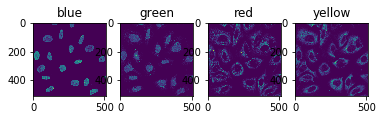

In [17]:
rows, cols = 1, 4
fig = plt.figure()

fig.add_subplot(rows, cols, 1, title='blue')
plt.imshow(img_blue)

fig.add_subplot(rows, cols, 2, title='green')
plt.imshow(img_green)

fig.add_subplot(rows, cols, 3, title='red')
plt.imshow(img_red)

fig.add_subplot(rows, cols, 4, title='yellow')
plt.imshow(img_yellow)

In [18]:
# get statistical attributes of a single channel
def getChannelAttr(pixel_data, channel):
    mean = np.mean(pixel_data)
    variance = np.var(pixel_data)
    max_entry = np.max(pixel_data)
    min_entry = np.min(pixel_data)
    print(ATTR_FMT.format(channel, mean, variance, max_entry, min_entry))
    return mean, variance, max_entry, min_entry

In [19]:
mean_blue, var_blue, max_blue, min_blue = getChannelAttr(img_blue, 'blue')
mean_green, var_green, max_green, min_green = getChannelAttr(img_green, 'green')
mean_red, var_red, max_red, min_red = getChannelAttr(img_red, 'red')
mean_yellow, var_yellow, max_yellow, min_yellow = getChannelAttr(img_yellow, 'yellow')

blue channel: mean = 0.0311894323677, variance = 0.0086731761694, max = 0.866666674614, min = 0.0
green channel: mean = 0.0351737998426, variance = 0.00661291088909, max = 1.0, min = 0.0
red channel: mean = 0.0471455343068, variance = 0.00794263370335, max = 1.0, min = 0.0
yellow channel: mean = 0.0532611347735, variance = 0.00853519514203, max = 1.0, min = 0.0


In [20]:
img_blue.shape, img_green.shape, img_red.shape, img_yellow.shape

((512, 512), (512, 512), (512, 512), (512, 512))

In [21]:
"""
height, width = img_blue.shape
img_blue = img_blue.reshape((height, width))
img_green = img_green.reshape((1, height, width))
img_red = img_red.reshape((1, height, width))
img_yellow = img_yellow.reshape((1, height, width))
"""
img = np.stack([img_blue, img_green, img_red, img_yellow], axis=0)
print(img.shape)

(4, 512, 512)


In [26]:
# loading labels
label_file = '/home/adil/dev/kaggle-protein-classification/data/train.csv'
labels_frame = pd.read_csv(label_file)
labels_frame['Target'] = labels_frame['Target'].apply(lambda s: [int(e) for e in s.split(' ')])
labels_frame.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]"
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]"
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5]
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1]
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18]


In [32]:
labels_frame = labels_frame.set_index('Id')
labels_frame.head()

,Target
Id,
00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,"[16, 0]"
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]"
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5]
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1]
001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[18]


In [39]:
labels_frame.loc[image_id, 'Target']

[7, 1, 2, 0]